In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df= pd.read_csv('Hypertension-risk-model-main.csv')

In [3]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [8]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

In [9]:
df = df[['male', 'age', 'currentSmoker', 'diabetes', 'BMI', 'heartRate',  'Risk']]

In [10]:
df.head()

,male,age,currentSmoker,diabetes,BMI,heartRate,Risk
0,1,39,0,0,26.97,80.0,0
1,0,46,0,0,28.73,95.0,0
2,1,48,1,0,25.34,75.0,0
3,0,61,1,0,28.58,65.0,1
4,0,46,1,0,23.10,85.0,0


In [12]:
df.isna().any()

male             False
age              False
currentSmoker    False
diabetes         False
BMI               True
heartRate         True
Risk             False
dtype: bool

In [17]:
df.dropna(inplace = True)

In [18]:
df.isna().any()

male             False
age              False
currentSmoker    False
diabetes         False
BMI              False
heartRate        False
Risk             False
dtype: bool

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>],
       [<Axes: title={'center': 'Risk'}>, <Axes: >, <Axes: >]],
      dtype=object)

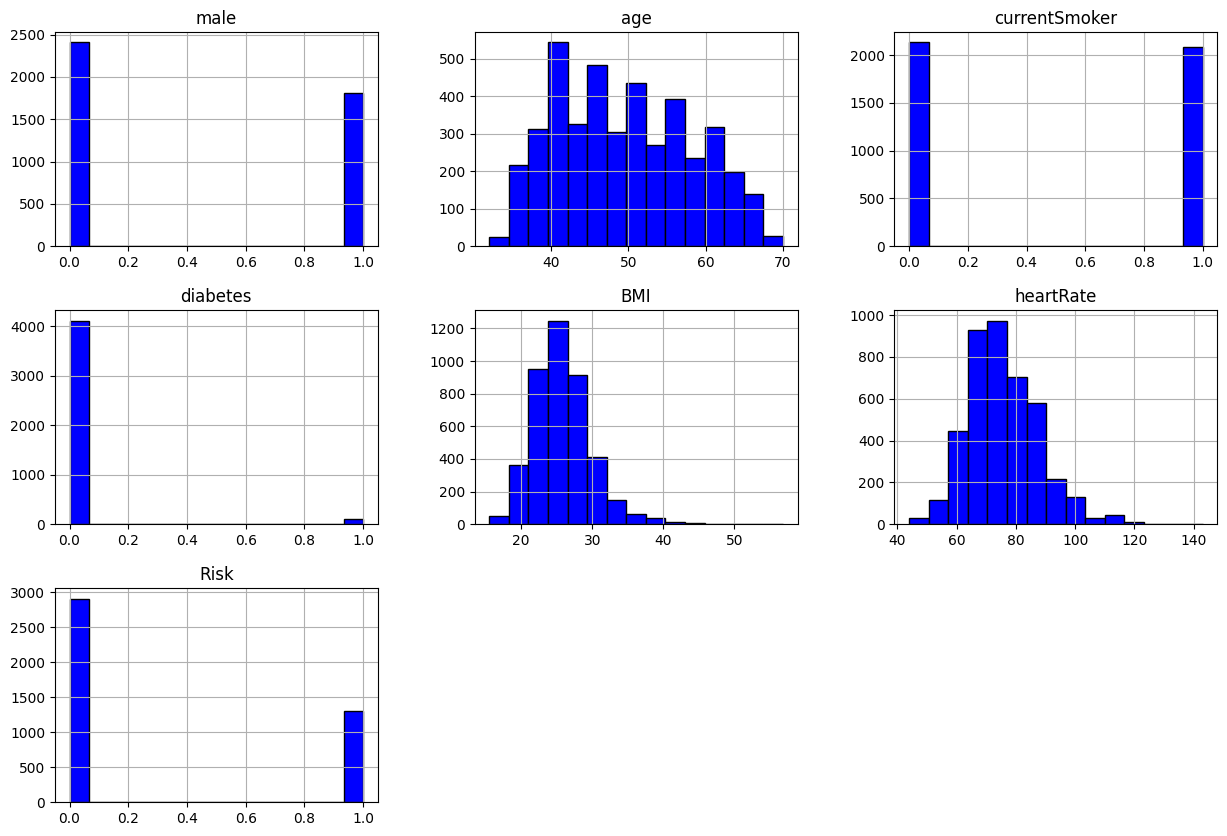

In [19]:
df.hist(figsize = (15,10),bins = 15, color = 'blue' , edgecolor = 'black')

In [23]:
df.drop(['diabetes','currentSmoker'] , axis = 1)

,male,age,BMI,heartRate,Risk
0,1,39,26.97,80.0,0
1,0,46,28.73,95.0,0
2,1,48,25.34,75.0,0
3,0,61,28.58,65.0,1
4,0,46,23.10,85.0,0
...,...,...,...,...,...
4235,0,48,22.00,84.0,0
4236,0,44,19.16,86.0,0
4237,0,52,21.47,80.0,0
4238,1,40,25.60,67.0,1


In [25]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split 

In [26]:
X = df.drop('Risk' , axis = 1)
y = df['Risk']

In [31]:
X_train ,X_test,y_train ,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [38]:
model1 = RF(n_estimators = 250,class_weight = 'balanced')

In [39]:
model1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=250)

In [40]:
model1.score(X_test,y_test)

0.6990521327014217

In [41]:
y_pred = model1.predict(X_test)

Model Evaluation Metrics:
Accuracy  : 0.6991
Precision : 0.5299
Recall    : 0.3577
F1-Score  : 0.4271


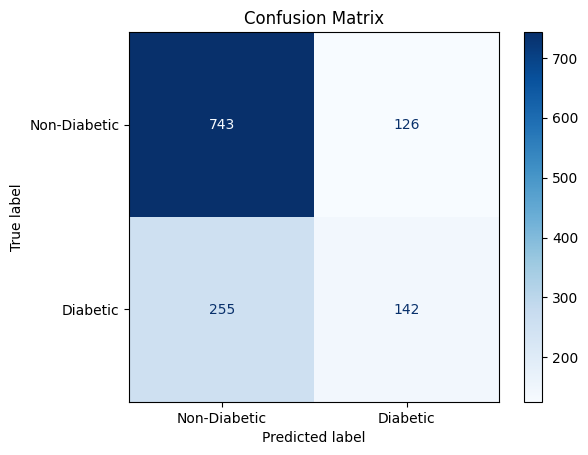

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [43]:
model1.predict_proba()

TypeError: ForestClassifier.predict_proba() missing 1 required positional argument: 'X'

In [45]:
y_proba = model1.predict_proba(X_test)[:, 1]

In [46]:
y_proba

array([0.572, 0.528, 0.612, ..., 0.128, 0.432, 0.024], shape=(1266,))

In [130]:
y_test

2328    1
189     0
2118    0
3319    0
3411    0
       ..
574     1
4037    0
289     0
4112    0
3975    0
Name: Risk, Length: 1266, dtype: int64

In [198]:
threshold = 0.45
y_pred_thresh = np.where(y_proba >= threshold, 1, 0)


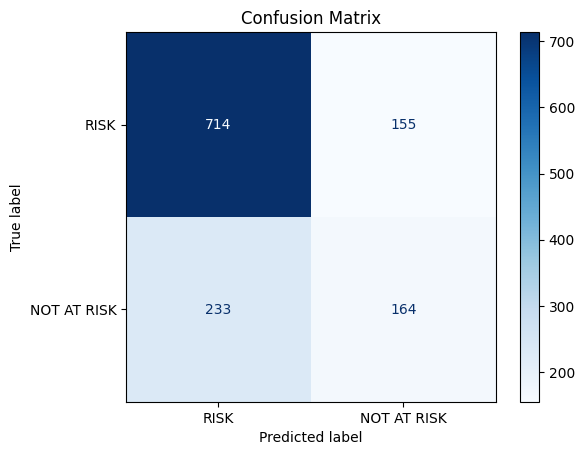

In [199]:
cm = confusion_matrix(y_test, y_pred_thresh)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["RISK", "NOT AT RISK"])
disp.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [200]:
accuracy  = accuracy_score(y_test, y_pred_thresh)
precision = precision_score(y_test, y_pred_thresh)
recall    = recall_score(y_test, y_pred_thresh)
f1        = f1_score(y_test, y_pred_thresh)

In [201]:
accuracy

0.693522906793049

In [202]:
precision

0.5141065830721003

In [203]:
recall

0.41309823677581864

In [204]:
f1

0.4581005586592179

1. 45 % threshhold = 95% accu;100% precition ,recall = 84,f1 = 91
2. 

In [148]:
X.columns

Index(['male', 'age', 'currentSmoker', 'diabetes', 'BMI', 'heartRate'], dtype='object')

In [106]:
from joblib import dump 
dump(model1 , 'Hypertension.joblib')

['Hypertension.joblib']